In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_smoothed_loss(csv_filename):
    """
    Reads a CSV file containing loss values, applies smoothing, and plots the loss curve.
    
    Parameters:
        csv_filename (str): Name of the CSV file containing loss values.
    
    Output:
        A smoothed loss plot with y-grid lines at every 0.5 interval.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    # Load dataset
    loss_df = pd.read_csv(csv_filename)

    # Ensure the index represents the batch number
    loss_df.index.name = "batch"

    # Assign 'k' based on batch number
    loss_df["k"] = 3  # Default value
    loss_df.loc[loss_df.index > 853, "k"] = 2
    loss_df.loc[loss_df.index > 1706, "k"] = 1

    # Apply moving average smoothing to the 'loss' column
    window_size = 20  # Adjust for more or less smoothing
    loss_df["smoothed_loss"] = loss_df["loss"].rolling(window=window_size, min_periods=1).mean()

    # Define colors for k-values
    colors = {1: "red", 2: "orange", 3: "blue"}

    plt.figure(figsize=(10, 5))

    # Loop through each k-value and plot separately with smoothed loss
    for k_value, color in colors.items():
        subset = loss_df[loss_df["k"] == k_value]
        plt.plot(subset.index, subset["smoothed_loss"], color=color, label=f"k={k_value}", alpha=0.9, linewidth=2)

    plt.xlabel("Batch Number")
    plt.ylabel("Smoothed Loss")
    plt.title(f"Training Loss Over Batches ({csv_filename.replace('.csv', '').replace('loss_','')}) - Smoothed")
    plt.ylim(bottom=0, top=3.0)

    # Add grid lines at every 0.5 interval
    y_ticks = np.arange(0, loss_df["smoothed_loss"].max() + 0.5, 0.5)
    plt.yticks(y_ticks)
    plt.grid(axis='y', linestyle='--', linewidth=1, alpha=0.7)
    plt.legend()
    plt.show()


# Example Usage:
# plot_smoothed_loss("loss_resnet50.csv")


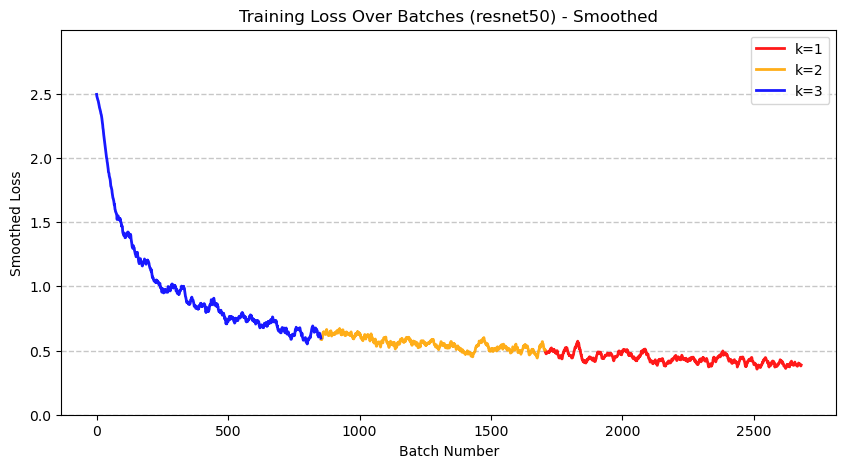

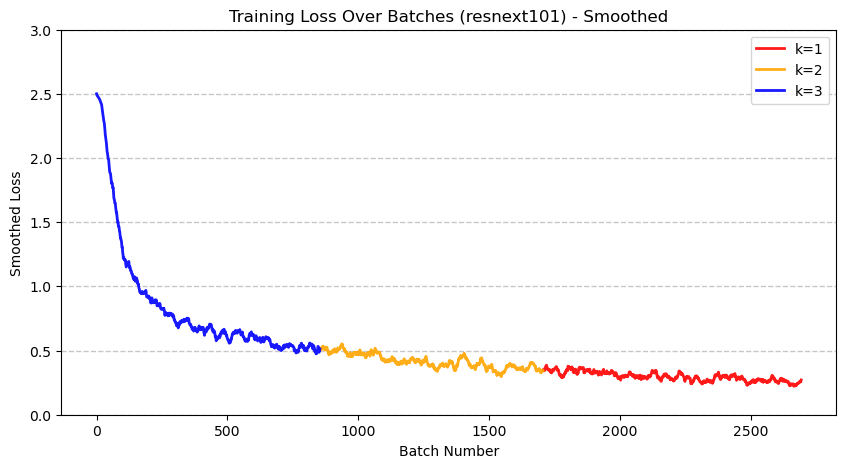

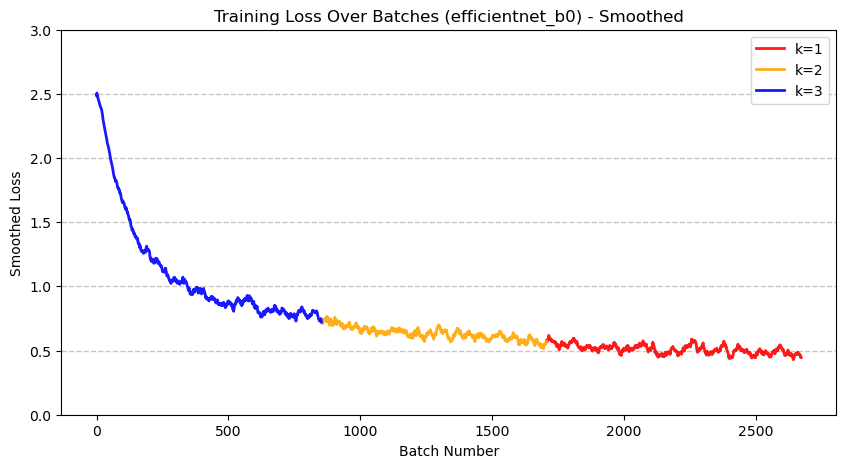

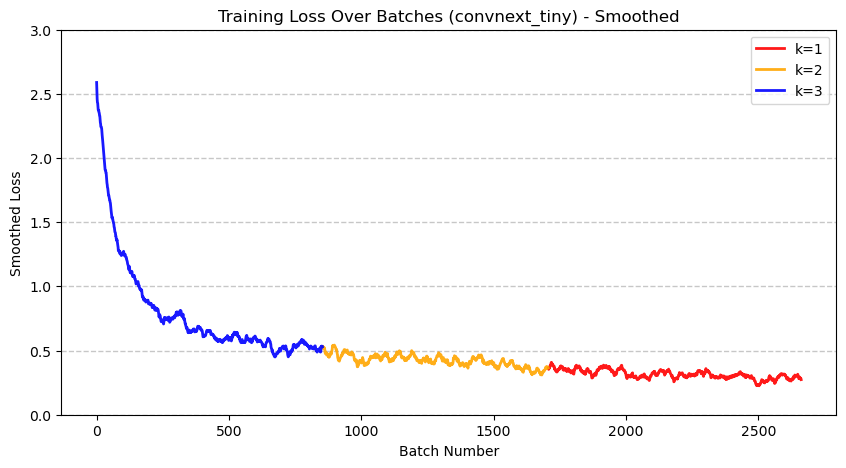

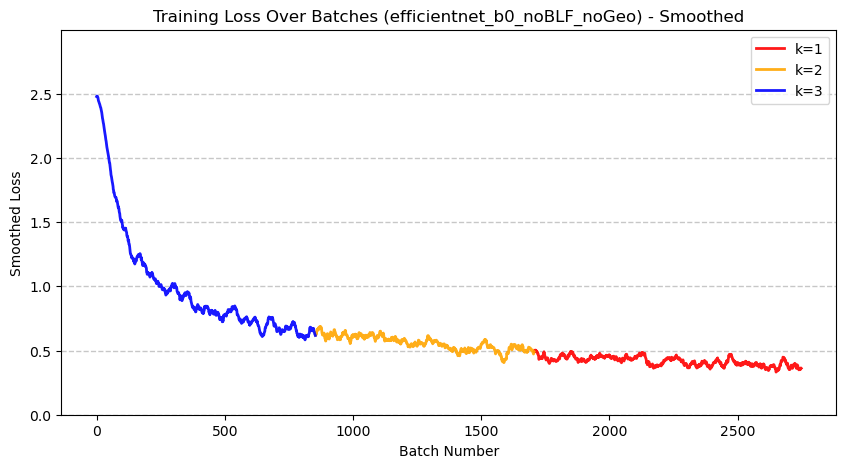

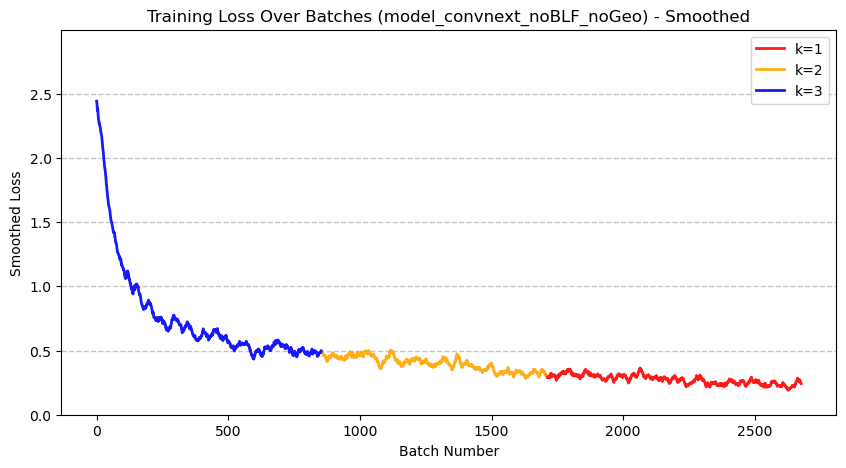

In [5]:
loss_list = ['loss_resnet50.csv', 'loss_resnext101.csv', 'loss_efficientnet_b0.csv', 'loss_convnext_tiny.csv', 'loss_efficientnet_b0_noBLF_noGeo.csv', 'loss_model_convnext_noBLF_noGeo.csv']

for loss in loss_list:
    plot_smoothed_loss(loss)